https://programmers.co.kr/learn/courses/30/lessons/87377

Ax + By + C = 0으로 표현할 수 있는 n개의 직선이 주어질 때, 이 직선의 교점 중 정수 좌표에 별을 그리려 합니다.

예를 들어, 다음과 같은 직선 5개를

- 2x - y + 4 = 0
- -2x - y + 4 = 0
- -y + 1 = 0
- 5x - 8y - 12 = 0
- 5x + 8y + 12 = 0

좌표 평면 위에 그리면 아래 그림과 같습니다.

이때, 모든 교점의 좌표는 (4, 1), (4, -4), (-4, -4), (-4, 1), (0, 4), (1.5, 1.0), (2.1, -0.19), (0, -1.5), (-2.1, -0.19), (-1.5, 1.0)입니다. 이 중 정수로만 표현되는 좌표는 (4, 1), (4, -4), (-4, -4), (-4, 1), (0, 4)입니다.

별이 그려진 부분은 *, 빈 공간(격자선이 교차하는 지점)은 .으로 표현하면 다음과 같습니다.
이때 격자판은 무한히 넓으니 모든 별을 포함하는 최소한의 크기만 나타내면 됩니다.

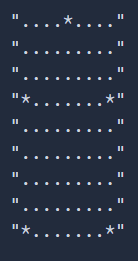

제한사항
- line의 세로(행) 길이는 2 이상 1,000 이하인 자연수입니다.
    - line의 가로(열) 길이는 3입니다.
    - line의 각 원소는 [A, B, C] 형태입니다.
    - A, B, C는 -100,000 이상 100,000 이하인 정수입니다.
    - 무수히 많은 교점이 생기는 직선 쌍은 주어지지 않습니다.
    - A = 0이면서 B = 0인 경우는 주어지지 않습니다.
- 정답은 1,000 * 1,000 크기 이내에서 표현됩니다.
- 별이 한 개 이상 그려지는 입력만 주어집니다.


In [1]:
line = [[2, -1, 4], [-2, -1, 4], [0, -1, 1], [5, -8, -12], [5, 8, 12]]
# ["....*....", ".........", ".........", "*.......*", ".........", ".........", ".........", ".........", "*.......*"]

In [ ]:
line = [[0, 1, -1], [1, 0, -1], [1, 0, 1]]
#line = [[1, -1, 0], [2, -1, 0]]
#line = [[1, -1, 0], [2, -1, 0], [4, -1, 0]]

참고 사항
Ax + By + E = 0
Cx + Dy + F = 0
두 직선의 교점이 유일하게 존재할 경우, 그 교점은 다음과 같습니다.

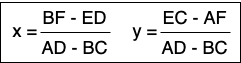RisingStarExpression.png

또, AD - BC = 0인 경우 두 직선은 평행 또는 일치합니다.

In [2]:
star = []
square = [1000,-1000,1000,-1000] # min_x, max_x, min_y, max_y 저장

In [3]:
from itertools import combinations

In [4]:
for lines in combinations(line, 2):
    a, b, e = lines[0][0], lines[0][1], lines[0][2]
    c, d, f = lines[1][0], lines[1][1], lines[1][2]
    bottom = a*d - b*c
    if bottom == 0: continue # AD - BC = 0인 경우 두 직선은 평행 또는 일치
    x, y = (b*f - e*d) / bottom, (e*c - a*f) / bottom
    if x % 1 != 0 or y % 1 != 0: continue  # 정수로만 표현되는 좌표 찾기
    x, y = int(x), int(y)
    star.append([x, y])
    square[0], square[1], square[2], square[3] = min(square[0], x), max(square[1], x), min(square[2], y), max(square[3], y)

In [5]:
star

[[0, 4], [-4, -4], [4, -4], [4, 1], [-4, 1]]

In [6]:
square

[-4, 4, -4, 4]

In [7]:
dots = [["."] * (square[1]-square[0] + 1) for _ in range(square[3]-square[2] + 1)]
dots

[['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.']]

In [8]:
for dot in star:
    if square[3]-square[2] == 0: dots[0][dot[0] + abs(square[0])] = '*'
    elif square[1]-square[0] == 0: dot[dot[1] + abs(square[2])][0] = '*'
    else: dots[dot[1] + abs(square[2])][dot[0] + abs(square[0])] = '*'

In [9]:
dots

[['*', '.', '.', '.', '.', '.', '.', '.', '*'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['*', '.', '.', '.', '.', '.', '.', '.', '*'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '*', '.', '.', '.', '.']]

In [10]:
answer = []
for idx in range(len(dots)-1,-1,-1):
    answer.append(''.join(dots[idx]))

In [11]:
answer

['....*....',
 '.........',
 '.........',
 '*.......*',
 '.........',
 '.........',
 '.........',
 '.........',
 '*.......*']

solution

In [12]:
def solution(line):
    answer = []
    star = []
    square = [1000,-1000,1000,-1000] # min_x, max_x, min_y, max_y 저장
    
    from itertools import combinations
    for lines in combinations(line, 2):
        a, b, e = lines[0][0], lines[0][1], lines[0][2]
        c, d, f = lines[1][0], lines[1][1], lines[1][2]
        bottom = a*d - b*c
        if bottom == 0: continue # AD - BC = 0인 경우 두 직선은 평행 또는 일치
        x, y = (b*f - e*d) / bottom, (e*c - a*f) / bottom
        if x % 1 != 0 or y % 1 != 0: continue  # 정수로만 표현되는 좌표 찾기
        x, y = int(x), int(y)
        star.append([x, y])
        square[0], square[1], square[2], square[3] = min(square[0], x), max(square[1], x), min(square[2], y), max(square[3], y)
    
    dots = [["."] * (square[1]-square[0] + 1) for _ in range(square[3]-square[2] + 1)]
    
    for dot in star:
        if square[3]-square[2] == 0: dots[0][dot[0] + abs(square[0])] = '*'
        elif square[1]-square[0] == 0: dot[dot[1] + abs(square[2])][0] = '*'
        else: dots[dot[1] + abs(square[2])][dot[0] + abs(square[0])] = '*'
    
    for idx in range(len(dots)-1,-1,-1):
        answer.append(''.join(dots[idx]))
    return answer

다른 사람 코드 보고 베낀 코드..

In [13]:
def solution(line):
    INF = float('inf')
    mark, L = [], len(line)
    minx, maxx, miny, maxy = INF, -INF, INF, -INF
    for i in range(L):
        for j in range(i+1, L):
            A,B,E,C,D,F = *line[i], *line[j] # 언패킹 리스트 하나씩 풀때는 * 안써도됨
            bottom = A*D - B*C
            if bottom == 0: continue # AD - BC = 0인 경우 두 직선은 평행 또는 일치
            x, y = (B*F - E*D) / bottom, (E*C - A*F) / bottom
            if x % 1 != 0 or y % 1 != 0: continue  # 정수로만 표현되는 좌표 찾기
            x, y = int(x), int(y)
            minx, maxx, miny, maxy = min(minx,x), max(maxx,x), min(miny,y), max(maxy,y)
            mark.append((x,y))
    dots = [['.' for _ in range(maxx-minx+1)] for _ in range(maxy-miny+1)]
    for x,y in mark:
        dots[maxy-y][x-minx] = '*' #좌표 뒤집어야함
    
    return [''.join(d) for d in dots]

In [15]:
solution(line)

['....*....',
 '.........',
 '.........',
 '*.......*',
 '.........',
 '.........',
 '.........',
 '.........',
 '*.......*']